In [1]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
import math

In [35]:
# path = input('path')
path = r"D:\study\moed2\2lab\c12-85v.xcr"
# path = r"D:\study\moed2\2lab\u0.xcr"
xlen, ylen = 1024, 1024
# xlen, ylen = 2048, 2500

In [36]:
dtype = np.dtype('>H')
arr = np.fromfile(path, dtype=dtype, sep='')
print(arr[0:10])
# print(arr.by)

[19269 21328 21024 17234  8265 28001 26469     0 22064 11830]


In [129]:
# print(arr.tobytes())
arr = arr.tobytes()
print(arr[:10])
print(arr[0])

AttributeError: 'bytes' object has no attribute 'tobytes'

In [124]:
print(len(arr))
print(arr[0])
arr2 = []
for i in range(0, len(arr),2):
    if  i<len(arr)-1:
        arr2.append(arr[i+1])
        arr2.append(arr[i])
        # arr[i] = tmp
print(len(arr2))
arr2 = np.array(arr2).tobytes()
print(arr2[:10])

2107392
75
2107392
b'E\x00\x00\x00K\x00\x00\x00P\x00'


In [118]:
# arr.tobytes()
# arr = arr.byteswap()
# arr.tobytes()
print(arr2[0:10])
arr = arr2
print(arr[0:10])
print(len(arr))

b'E\x00\x00\x00K\x00\x00\x00P\x00'
b'E\x00\x00\x00K\x00\x00\x00P\x00'
8429568


In [37]:
ln_all = len(arr)
ln_need = xlen*ylen
print(ln_need)
# print(arr)
# print(len(arr))
# print(len(arr[ln_all-ln_need:]))

1048576


In [38]:
# c12_x, c12_y = len(arr), 1024
arr=arr[ln_all-ln_need:]
print(len(arr))

# for i in range(len(arr)):
#     if  i<len(arr)-1 and arr[i+1] < arr[i]:
#         tmp = arr[i+1]
#         arr[i+1] = arr[i]
#         arr[i] = tmp
print(len(arr))
new_arr = np.reshape(arr, (ylen, xlen))

1048576
1048576


In [ ]:
for i in range(0, new_arr.shape[0], 2):
    for e in range(0, new_arr.shape[1], 2):
        if (new_arr[i, e] )

In [146]:
print(img[300,700]%255)

# img_abs = np.abs(img)
# # img_abs/=np.max(img_abs)
# print(np.sqrt(img_abs[:100]))

220.0


In [15]:
img_abs_reverse = [[-elem2 if elem2>0 else elem2 for elem2 in elem] for elem in img]
# img_abs_reverse = [[0 if elem2>255 else elem2 for elem2 in elem] for elem in img]

NameError: name 'img_abs_reverse' is not defined

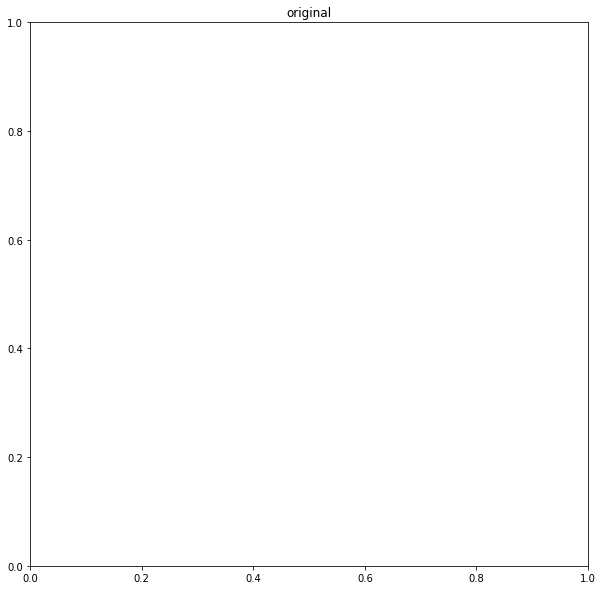

In [30]:
# print(img_abs_reverse[:100])
plt.figure(figsize=(10,10))
plt.title('original')
plt.imshow(img_abs_reverse, cmap='gray')

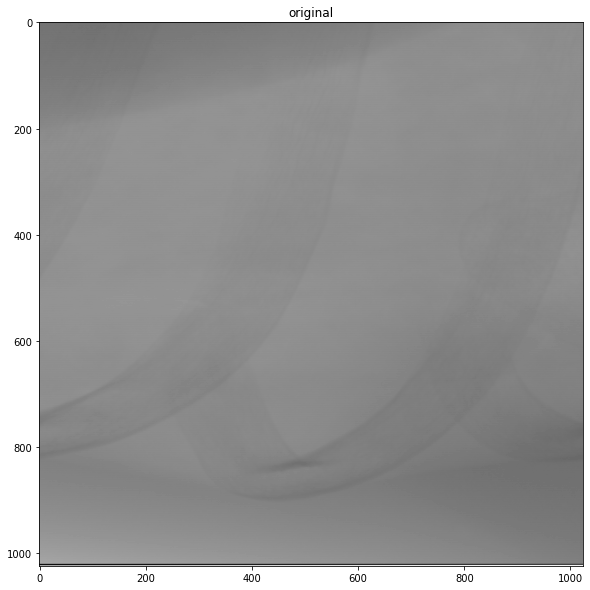

In [39]:
# img = np.array(new_arr)/255
img = np.array(new_arr, dtype='float')
# print(img)
plt.figure(figsize=(10,10))
plt.title('original')
plt.imshow(img, cmap='gray')

In [99]:
# print(np.abs(img))
img = img_abs_reverse

In [40]:
# img/=255
# img=np.abs(img)
img[700,300] = 0
# img%=255
mx = np.max(img)
mn = np.min(img)
amp = float(mx)-float(mn)
print(f'{mx=}')
print(f'{mn=}')
print(f'{amp=}')
img_restore_shift = np.array(((img-mn)/amp)*255).astype('int')
print(img_restore_shift[:100])

mx=4093.0
mn=0.0
amp=4093.0
[[115 115 115 ... 141 141 141]
 [116 116 116 ... 139 139 140]
 [114 114 114 ... 138 138 138]
 ...
 [120 120 120 ... 139 139 139]
 [121 121 121 ... 142 142 142]
 [123 123 122 ... 141 141 141]]


In [13]:
# img_dr = cv.circle(img,(300,700), 10, (0,0,255), -1)
print(np.max(img_restore_shift))
print(np.min(img_restore_shift))

255
0


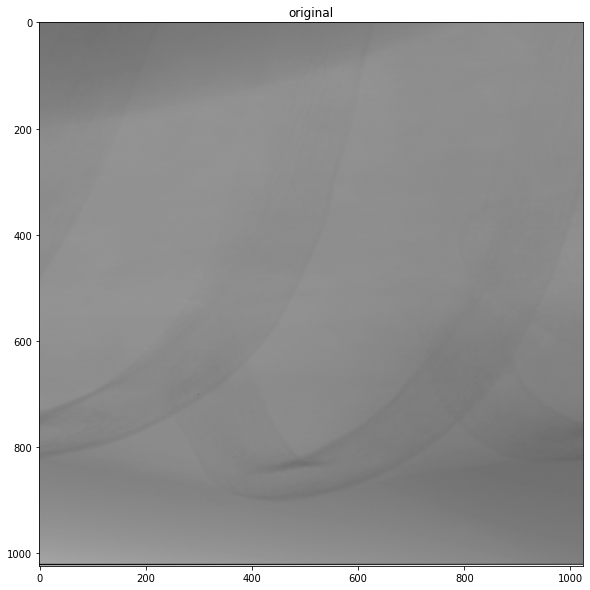

In [41]:
# img_restore_shift = np.array(img_restore_shift)
# print(img)
plt.figure(figsize=(10,10))
plt.title('original')
plt.imshow(img_restore_shift, cmap='gray')

In [42]:
scr_gray = img_restore_shift[:,:,np.newaxis]
src_gray = np.tile(scr_gray,(1,1,3))
src_gray = src_gray/255

def show_picture(image):
    try:
        cv.imshow('window_name', image)
        cv.waitKey(0)
        cv.destroyAllWindows()
    except Exception :
        cv.destroyAllWindows()
        print('error')

show_picture(src_gray)

[[[0.55294118 0.55294118 0.55294118]
  [0.54901961 0.54901961 0.54901961]
  [0.54117647 0.54117647 0.54117647]
  ...
  [0.30196078 0.30196078 0.30196078]
  [0.96470588 0.96470588 0.96470588]
  [1.         1.         1.        ]]

 [[0.55294118 0.55294118 0.55294118]
  [0.54509804 0.54509804 0.54509804]
  [0.54117647 0.54117647 0.54117647]
  ...
  [0.30196078 0.30196078 0.30196078]
  [0.96470588 0.96470588 0.96470588]
  [1.         1.         1.        ]]]


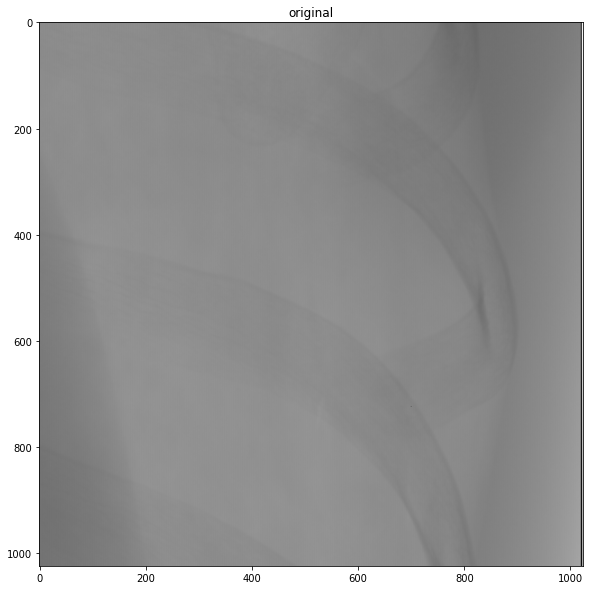

In [43]:
# print(img_restore_shift[:2])
rotated = cv.rotate(src_gray, cv.ROTATE_90_COUNTERCLOCKWISE)
plt.figure(figsize=(10,10))
plt.title('original')
plt.imshow(rotated, cmap='gray')
print(rotated[:2])
show_picture(rotated)

In [33]:
def to_png_save(image):
    print(path_save+'.png')
    image = (image*255).astype('int')
    isWritten = cv.imwrite(path_save+'.png', image)
    if isWritten:
	    print('Image is successfully saved as file.')
    else:
        print('not_saved')

In [45]:
path_save = r"D:\study\moed2\2lab\c12-85v"
# path_save = r"D:\study\moed2\2lab\u0"

# cv.imwrite(r"D:\учеба\МОЭД2\2 лаба\u0.xgs",rotated)
# bytes_save=list(arr[:ln_all-ln_need])+list(np.reshape(rotated, (xlen*ylen)))
to_save = rotated[:,:,2]
bytes_save=np.reshape(to_save, (xlen*ylen))

np.array(bytes_save).tofile(path_save + '.xgs')

In [46]:
to_png_save(to_save)
# new_arr = np.reshape(arr, (ylen, xlen))

D:\study\moed2\2lab\c12-85v.png
Image is successfully saved as file.


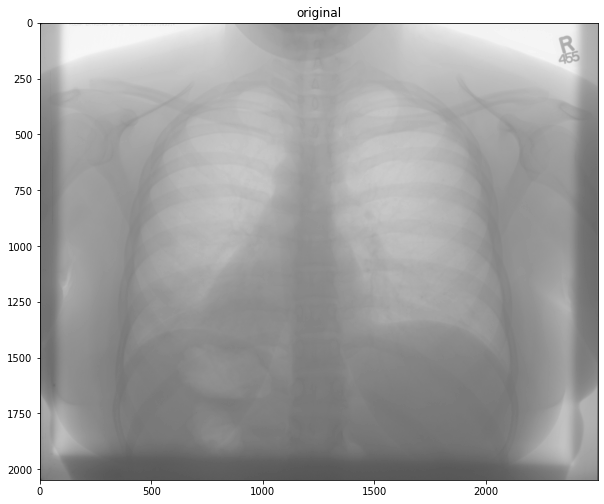

In [21]:
# path = r"D:\учеба\МОЭД2\2 лаба\c12-85v.xgs"
path_check = r"D:\study\МОЭД2\2 лаба\u0.xgs"
# xlen, ylen = 1024, 1024
xlen, ylen = 2048, 2500

dtype = np.dtype('float')
arr = np.fromfile(path_check, dtype=dtype, sep='')

ln_all = len(arr)
ln_need = xlen*ylen

arr=arr[ln_all-ln_need:]
new_arr = np.reshape(arr, (xlen, ylen))

img = np.array(new_arr, dtype='float')
# print(img)
plt.figure(figsize=(10,10))
plt.title('original')
plt.imshow(np.abs(img), cmap='gray')